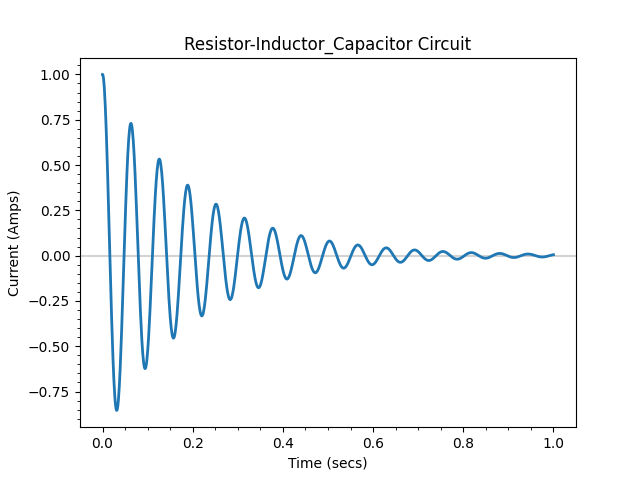

In [3]:
"""rlc_circuit.ipynb"""
# Cell 1

# Code is based on that provided by Dr. Biersach
from __future__ import annotations

import typing

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.ticker import AutoMinorLocator

if typing.TYPE_CHECKING:
    from typing import Any
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

# Defining variables
r: float = 0.1 # resitance in ohms
l: float = 0.01 # inductance in henries
c: float = 0.01 # capacitance in farads
i_0: float = 1.0 # current in amps (initial)

def model(time: float, state_vector: tuple[float, float]) -> tuple[float, float]:
    i_dot: float
    i: float
    i_dot, i = state_vector
    d_i_dot: float = -r / l * i_dot - 1/ (l * c) * i
    d_i: float = i_dot
    return d_i_dot, d_i

def plot(ax: Axes) -> None:
    """plots current over time flowing through an RLC circuit that maintains a constant DC voltage"""
    t0: float = 0.0 # initial time (secs)
    tf: float = 1.0 # final time (secs)
    ts: float = 1_000 # time steps

    sol: Any = solve_ivp(model, (t0, tf), [0, i_0], max_step=(tf - t0) / ts)

    t: NDArray[np.float_] = np.array(sol.t, dtype=np.float_)
    i: NDArray[np.float_]
    _, i = np.array(sol.y, dtype=np.float_)

    ax.plot(t, i, linewidth=2, zorder=3)

    # labeling the graph's title, x and y labels
    ax.set_title("Resistor-Inductor_Capacitor Circuit")
    ax.set_xlabel("Time (secs)")
    ax.set_ylabel("Current (Amps)")
    ax.axhline(y=0.0, color="lightgray")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

def main() -> None:
    plt.close("all")
    plt.figure(" ")
    plot(plt.axes())
    plt.show()

main()